In [1]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data as mnist_load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer,Dense

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

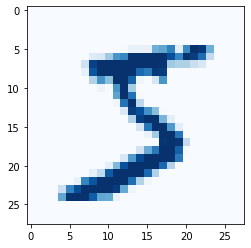

In [6]:
plt.imshow(x_train[0],cmap='Blues')

In [7]:
num_datapoints_train = x_train.shape[0]
num_datapoints_test = x_test.shape[0]
x_train = np.reshape(x_train, [num_datapoints_train, -1])
x_test = np.reshape(x_test, [num_datapoints_test, -1])
x_train.shape

(60000, 784)

In [8]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

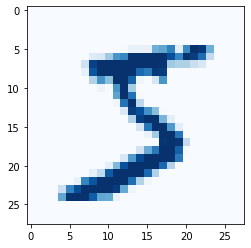

In [9]:
plt.imshow(x_train[0].reshape(28,28),cmap='Blues')

In [10]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

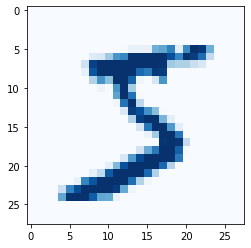

In [12]:
plt.imshow(x_train[0].reshape(28,28),cmap='Blues')

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
np.array(np.unique(y_train,return_counts=True)).T

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

In [15]:
np.array(np.unique(y_test,return_counts=True)).T

array([[   0,  980],
       [   1, 1135],
       [   2, 1032],
       [   3, 1010],
       [   4,  982],
       [   5,  892],
       [   6,  958],
       [   7, 1028],
       [   8,  974],
       [   9, 1009]])

In [16]:
x_train.shape

(60000, 784)

In [17]:
def get_mnist_mlp():
    model = Sequential()
    model.add(InputLayer(input_shape=(784,)))
    model.add(Dense(1000,activation='relu'))
    model.add(Dense(1000,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [18]:
model = get_mnist_mlp()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 90us/sample - loss: 2.3634 - accuracy: 0.0767


[2.3633921703338623, 0.0767]

In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1984 - accuracy: 0.9435 - val_loss: 0.1253 - val_accuracy: 0.9685
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1211 - accuracy: 0.9723 - val_loss: 0.1293 - val_accuracy: 0.9718
Epoch 3/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1030 - accuracy: 0.9782 - val_loss: 0.1190 - val_accuracy: 0.9777
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0861 - accuracy: 0.9824 - val_loss: 0.1721 - val_accuracy: 0.9771
Epoch 5/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0821 - accuracy: 0.9840 - val_loss: 0.1772 - val_accuracy: 0.9786


In [23]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.1772 - accuracy: 0.9786


[0.17723168838755404, 0.9786]